In [3]:
libname stat2131 '';

In [5]:
data stat2131.pg_steam; /* Creates the file `pg_steam.sas' in the library `stat2131'*/
input seq month	steam fat glycerin wind cday opday frezday temp starts;  /* The variables we are creating */	
datalines;
1  1  10.98  5.20  0.61  7.4  31  20  22  35.3  4
2  2  11.13  5.12  0.64  8.0  29  20  25  29.7  5
3  3  12.51  6.19  0.78  7.4  31  23  17  30.8  4
4  4  8.40  3.89  0.49  7.5  30  20  22  58.8  4
5  5  9.27  6.28  0.84  5.5  31  21  0  61.4  5
6  6  8.73  5.76  0.74  8.9  30  22  0  71.3  4
7  7  6.36  3.45  0.42  4.1  31  11  0  74.4  2
8  8  8.50  6.57  0.87  4.1  31  23  0  76.7  5
9  9  7.82  5.69  0.75  4.1  30  21  0  70.7  4
10  10  9.14  6.14  0.76  4.5  31  20  0  57.5  5
11  11  8.24  4.84  0.65  10.3 30  20  11  46.4  4
12  12  12.19  4.88  0.62  6.9  31  21  12  28.9  4
13  1  11.88  6.03  0.79  6.6  31  21  25  28.1  5
14  2  9.57  4.55  0.60  7.3  28  19  18  39.1  5
15  3  10.94  5.71  0.70  8.1  31  23  5  46.8  4
16  4  9.58  5.67  0.74  8.4  30  20  7  48.5  4
17  5  10.09  6.72  0.85  6.1  31  22  0  59.3  6
18  6  8.11  4.95  0.67  4.9  30  22  0  70.0  4
19  7  6.83  4.62  0.45  4.6  31  11  0  70.0  3
20  8  8.88  6.60  0.95  3.7  31  23  0  74.5  4
21  9  7.68  5.01  0.64  4.7  30  20  0  72.1  4
22  10  8.47  5.68  0.75  5.3  31  21  1  58.1  6
23  11  8.86  5.28  0.70  6.2  30  20  14  44.6  4
24  12  10.36  5.36  0.67  6.8  31  20  22  33.4  4
25  1  11.08  5.87  0.70  7.5  31  22  28  28.6  5
;
run;
proc print data = stat2131.pg_steam; run;

Obs,seq,month,steam,fat,glycerin,wind,cday,opday,frezday,temp,starts
1,1,1,10.98,5.20,0.61,7.4,31,20,22,35.3,4
2,2,2,11.13,5.12,0.64,8.0,29,20,25,29.7,5
3,3,3,12.51,6.19,0.78,7.4,31,23,17,30.8,4
4,4,4,8.40,3.89,0.49,7.5,30,20,22,58.8,4
5,5,5,9.27,6.28,0.84,5.5,31,21,0,61.4,5
6,6,6,8.73,5.76,0.74,8.9,30,22,0,71.3,4
7,7,7,6.36,3.45,0.42,4.1,31,11,0,74.4,2
8,8,8,8.50,6.57,0.87,4.1,31,23,0,76.7,5
9,9,9,7.82,5.69,0.75,4.1,30,21,0,70.7,4
10,10,10,9.14,6.14,0.76,4.5,31,20,0,57.5,5


In [16]:
data pg_steam2;
  set stat2131.pg_steam;
   wind2=wind*wind;
run;
proc print data=pg_steam2(obs=10);
run;

Obs,seq,month,steam,fat,glycerin,wind,cday,opday,frezday,temp,starts,wind2
1,1,1,10.98,5.20,0.61,7.4,31,20,22,35.3,4,54.76
2,2,2,11.13,5.12,0.64,8.0,29,20,25,29.7,5,64.00
3,3,3,12.51,6.19,0.78,7.4,31,23,17,30.8,4,54.76
4,4,4,8.40,3.89,0.49,7.5,30,20,22,58.8,4,56.25
5,5,5,9.27,6.28,0.84,5.5,31,21,0,61.4,5,30.25
6,6,6,8.73,5.76,0.74,8.9,30,22,0,71.3,4,79.21
7,7,7,6.36,3.45,0.42,4.1,31,11,0,74.4,2,16.81
8,8,8,8.50,6.57,0.87,4.1,31,23,0,76.7,5,16.81
9,9,9,7.82,5.69,0.75,4.1,30,21,0,70.7,4,16.81
10,10,10,9.14,6.14,0.76,4.5,31,20,0,57.5,5,20.25



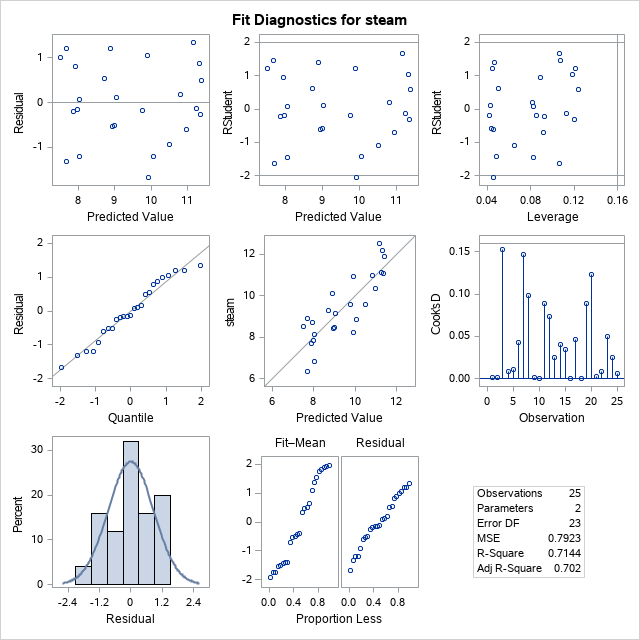
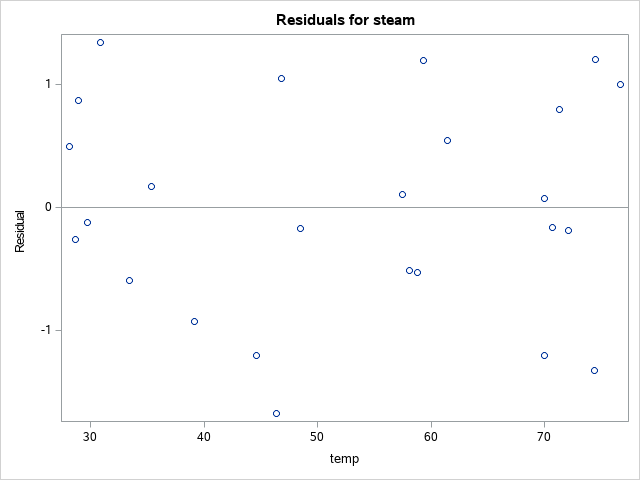
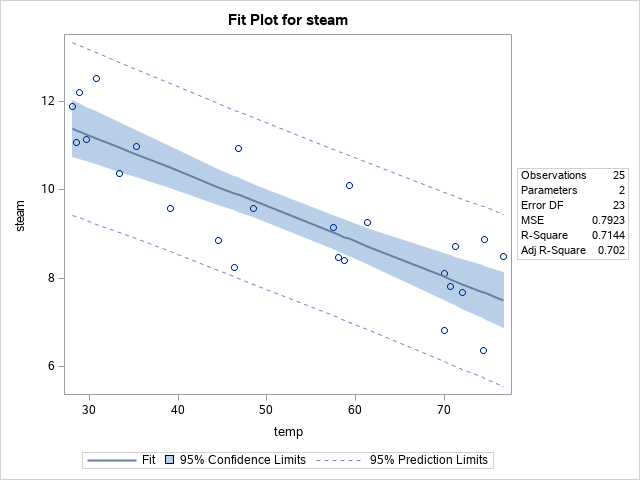

In [24]:
proc reg data=pg_steam2;
model steam=temp / clb clm cli; *ci for coefficient, prediction intervals and regression function;
run;


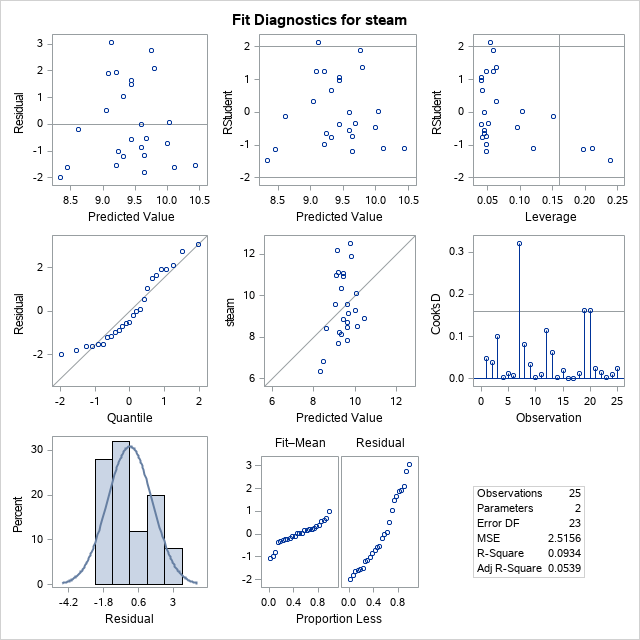
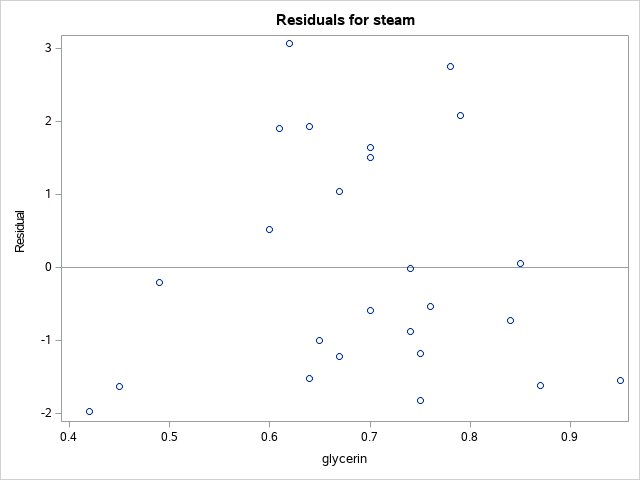
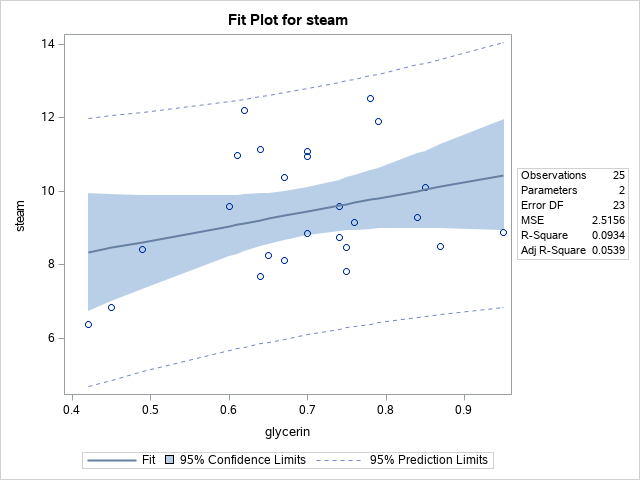

In [29]:
proc reg data=pg_steam2;
model steam=glycerin / clb cli;
run;


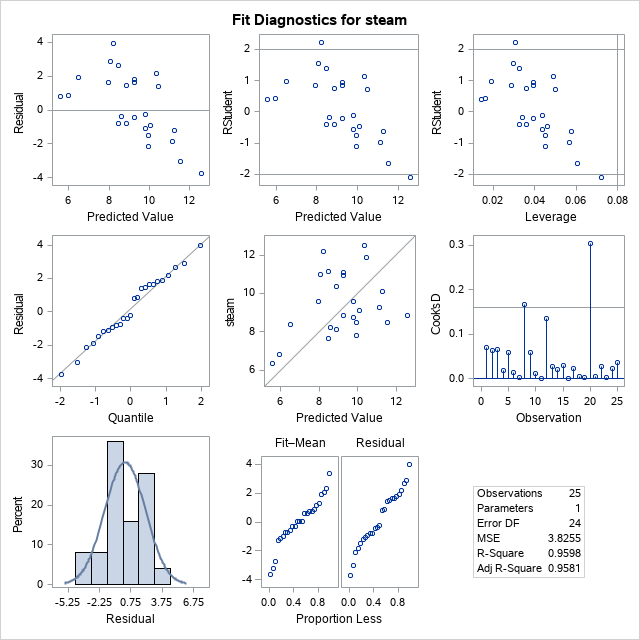
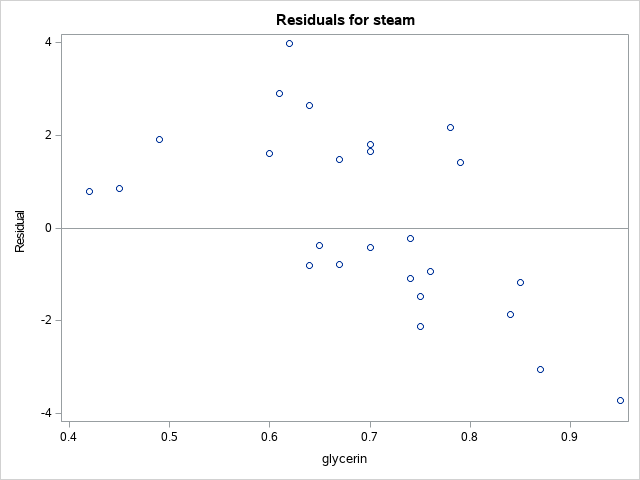
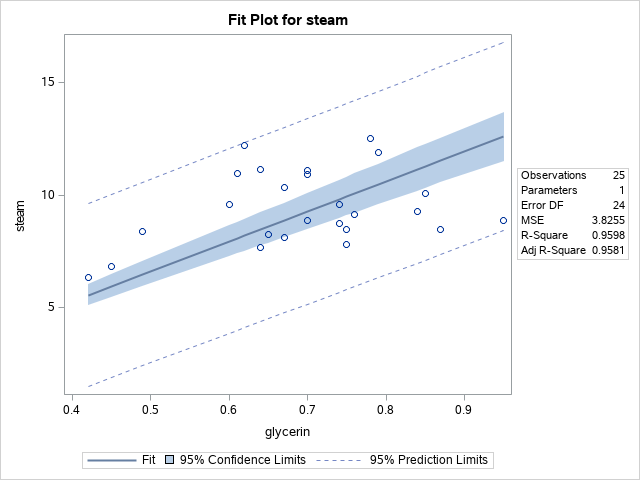

In [30]:
proc reg data=pg_steam2;
  model steam=glycerin / noint; /*removing the intercept*/
run;


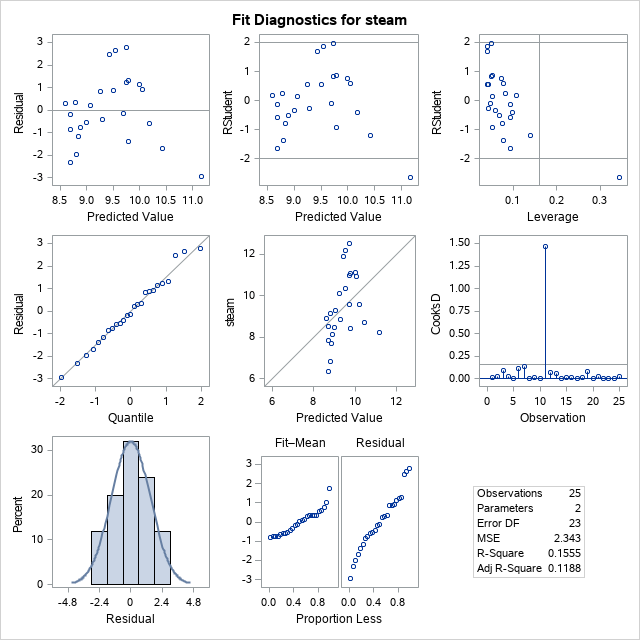
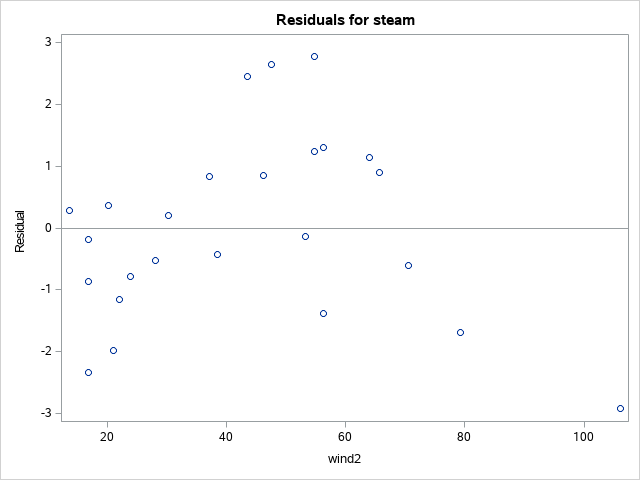
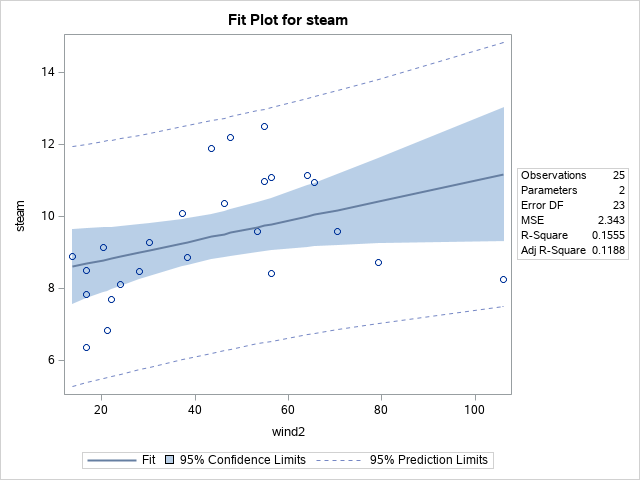

In [31]:
proc reg data=pg_steam2;
  model steam=wind2;
  test intercept + 60*wind2=9; *testing a linear combination;
run;


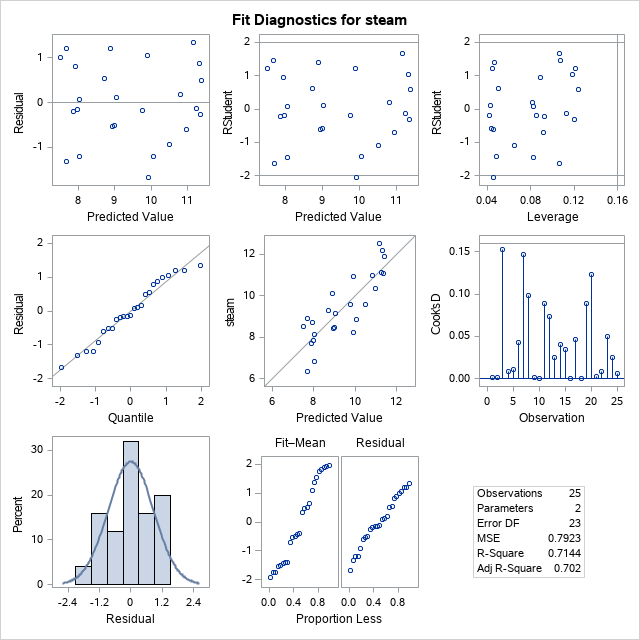
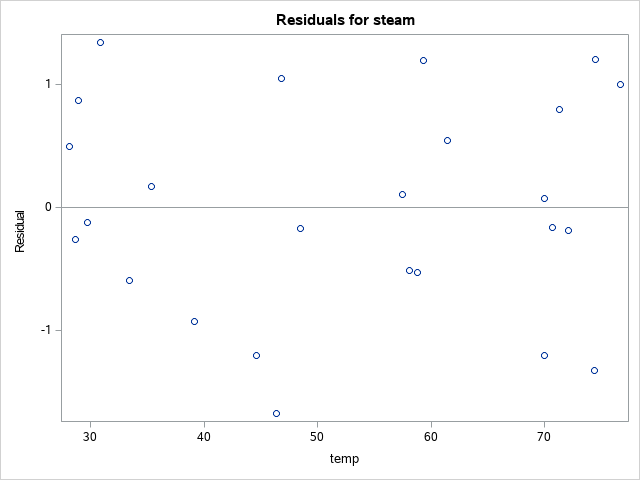
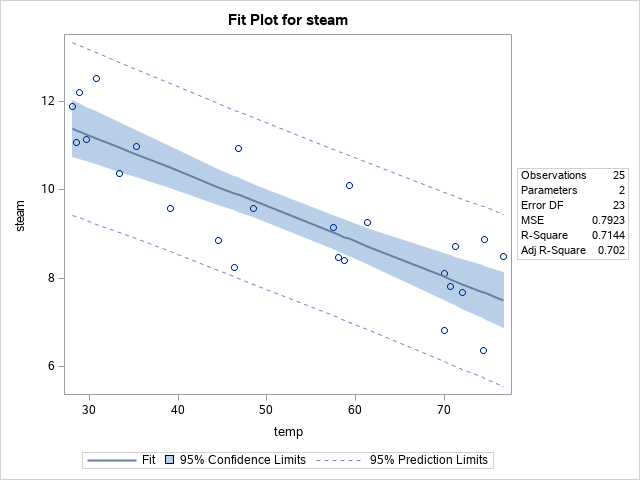
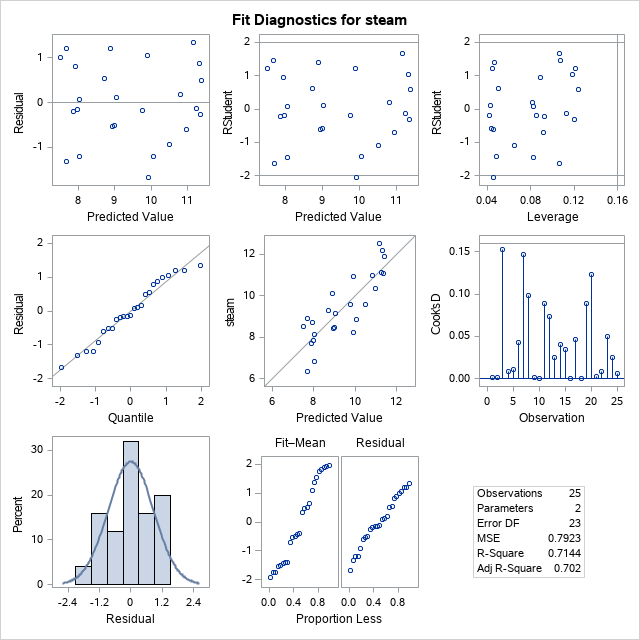
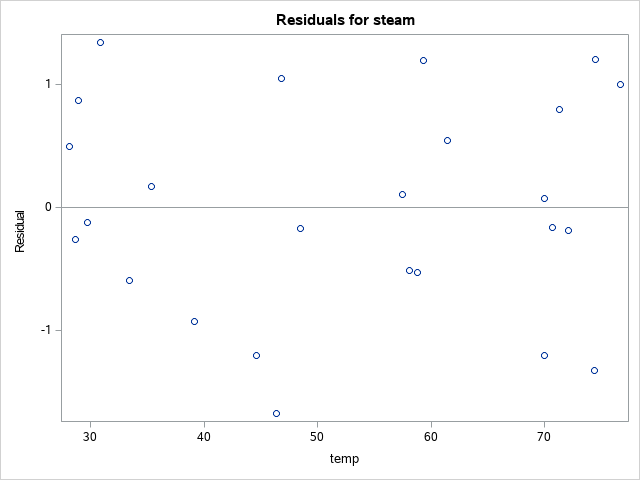
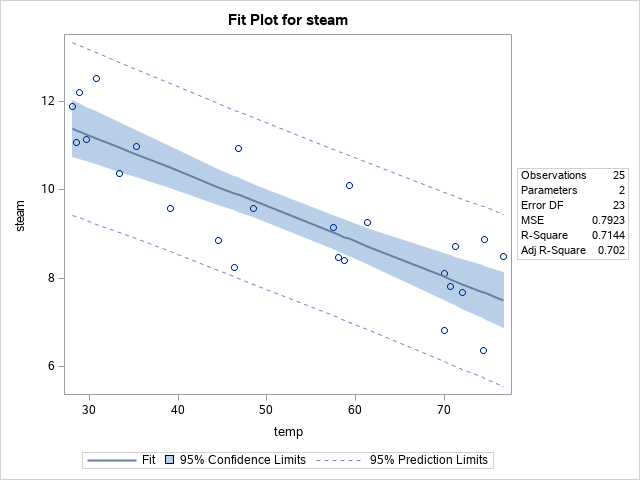

In [32]:
proc reg data=pg_steam2;
  model steam=temp;
  print COVB; *covariance of estimates;
run;


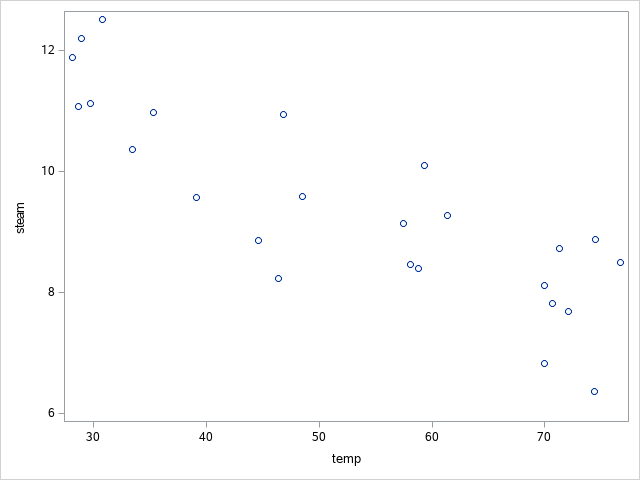

In [34]:
proc sgplot data=pg_steam2;
scatter Y=steam X=temp;
run;

In [35]:
*Power;
data power;
cutval = tinv(.975,23);
sigma2 = 2.52 ;
beta =   9;
Omega = 0.38;
delta = beta / sqrt(sigma2/Omega);
powerhigh = 1 - CDF('t', cutval, 23, delta);
powerlow = CDF('t', -cutval, 23, delta);
power = powerhigh + powerlow;
run;
proc print; run;

Obs,cutval,sigma2,beta,Omega,delta,powerhigh,powerlow,power
1,2.06866,2.52,9,0.38,3.49489,0.91708,5.2047E-8,0.91708



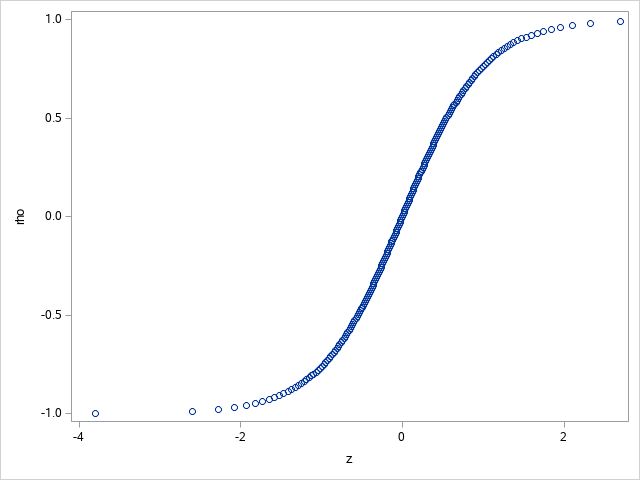

In [37]:
*Fisher Transformation;
data fish;
do rho=-.999 to .999 by .01;
z = .5*log( (1+rho)/(1-rho));
output;
end;
run;

proc sgplot data=fish;
   scatter X=z Y=rho ;
run;


In [38]:
*correlation analysis;
proc corr data=pg_steam2 spearman fisher;
var steam temp;
run;